**The Boston Housing Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

1. CRIM - per capita crime rate by town

2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \$10,000
PTRATIO - pupil-teacher ratio by town
11. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12. LSTAT - % lower status of the population
13. MEDV - Median value of owner-occupied homes in \$1000's

**Linear Regression Analysis**

 We are going to use Linear Regression Model for this analysis. But first we need to Explore the Dataset.
 We need to load some packages for exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

We then Load the Boston Datasets from scikit library.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_data =boston.data 

Convert the boston data into dataframe and print the head of the DataFrame (first five rows of the boston data)

In [3]:
boston_df = pd.DataFrame(boston_data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see from the dataframe that the **independent** varibles for our analysis are **"CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT"** but the **dependent** variable **"MEDV"** for the analysis is not in the frame. So we add a new Column
"MEDV" to the frame and check the head again.

In [4]:
boston_df["MEDV"] = boston.target

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Data PreProcessing**

Our next step is to check for any missing value in our data. Here we count the number of missing values for each feature in our dataframe. 

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Exploratory Data Analysis**

Since there are no missing values in the data, we use visualizations to understand the relationship between the dependent varible and the independent variables.

First, We plot the distribution of the dependent variable **MEDV** using the seaborn library.

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

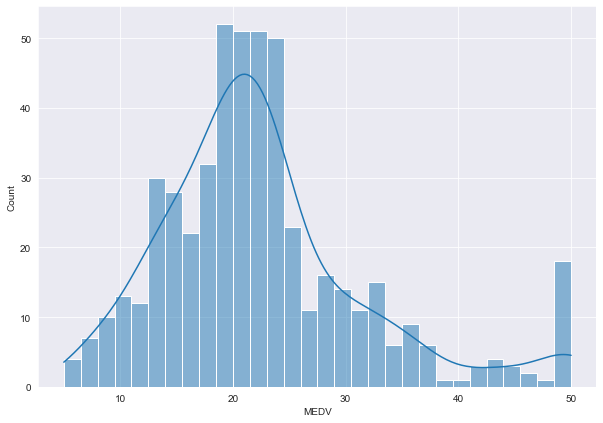

In [8]:
plt.figure(figsize=(10,7))
sns.histplot(boston_df["MEDV"],kde=True,bins = 30)

We see from the above plot that the price of houses "**MEDV**" are normally distributed with some few outliers.

<AxesSubplot:>

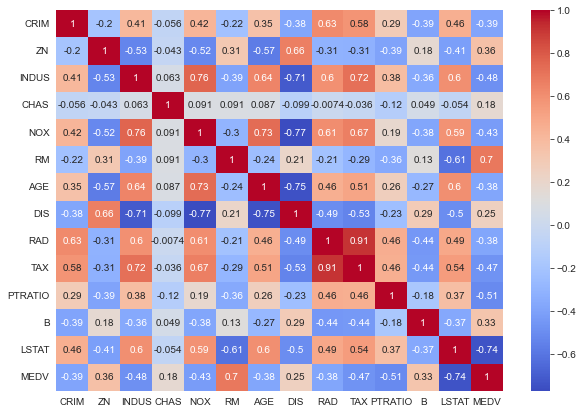

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(boston_df.corr(),cmap = "coolwarm",annot=True)

The Second plot is a correlation matrix plot that measures the linear relationshipss between the variables The correlation coeffecient ranges from -1 to 1. If the value is  close to 1, it means there is a strong positive correlation between the two variables. On the other hand,
when the value is  close to -1, it means there is a strong negative correlation.

**Observations**

From the heatmap, we see that the independent variables **RM** and **LSTAT** have very strong linear relationship with the dependent variable **MEDV**. With correlations 0.7 for **RM** and -0.74 for **LSTAT**.

So selecting features for the linear model we check for multicolinearity between the independent variables. From the heatmap we observe that the correlation between **RAD** and **TAX** is 0.91 which is a strong positive relationship. Since multicolinearity among independent variables will result in less reliable inferences we conclude by choosing
**RM** and **LSTAT** for our analysis.


We then plot the independent variables against the dependent variables and observe their properties.

**Observations**

- Prices rise in lockstep with the value of the RM. There are few outliers.

- With a rise in LSTAT, prices tend to fall. Despite the fact that it does not appear to be a straight line.

Text(0.5, 1.0, 'Scatter of LSTAT against MEDV')

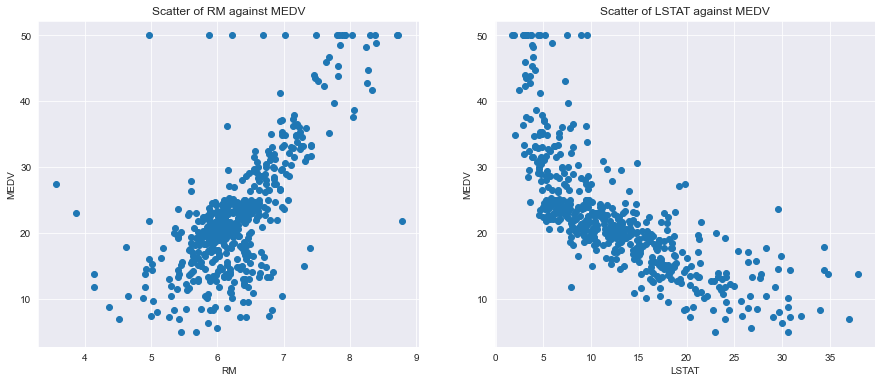

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(boston_df["RM"],boston_df["MEDV"])
axes[0].set_xlabel("RM")
axes[0].set_ylabel("MEDV")
axes[0].set_title("Scatter of RM against MEDV")

axes[1].scatter(boston_df["LSTAT"],boston_df["MEDV"])
axes[1].set_xlabel("LSTAT")
axes[1].set_ylabel("MEDV")
axes[1].set_title("Scatter of LSTAT against MEDV")

Now that we've explored the data a bit, let's go ahead and build our regression model.We split the data into training and testing sets.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = boston_df[["LSTAT","RM"]]
y = boston_df["MEDV"]

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
lm.intercept_

2.7362403426066315

In [18]:
lm.coef_

array([-0.71722954,  4.58938833])

In [19]:
coeff_df =pd.DataFrame(lm.coef_,X_train.columns,columns=["Coeffecients"])

In [20]:
coeff_df

,Coeffecients
LSTAT,-0.717230
RM,4.589388


From the above model, we can write our regression equation as ***medv = 2.736 - 0.717230(LSTAT) + 4.589388(RM)***.

**Interpretations**

- the price of houses will decrease by $717.23 per 1% rise in the percentage of homeowners in the neighborhood considered "lower class" (working poor) holding all other variables constant.

- the price of houses will increase by $4,589.388 per average increase in the number of rooms per dwelling holding all other variables constant.

- the average price of houses in Boston is $2,736.24 when all the independent variables is zero.

### MODEL EVALUATION

Model Evaluation determines generalized correctness for previously unknown data. It also determines whether or not our model is overfitting. Overfitted models perform well on test datasets but perform badly on real-world datasets. As a consequence, if there is no noticeable difference in the accuracy of the train and test sets, we may deem our model deployable.

In [21]:
predictions = lm.predict(X_test)

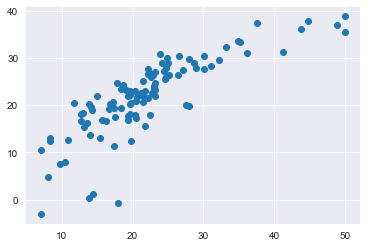

In [22]:
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

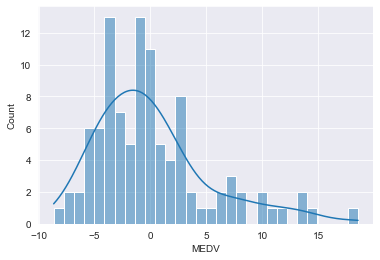

In [23]:
sns.histplot((y_test-predictions),bins=30,kde = True)

In [24]:
from sklearn import metrics

In [25]:
predictions1 = lm.predict(X_train)

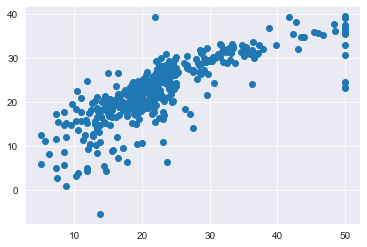

In [26]:
plt.scatter(y_train,predictions1)

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

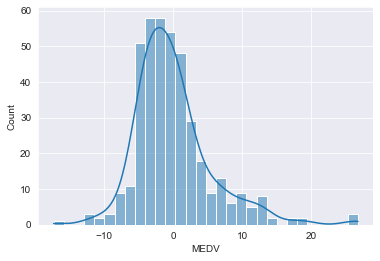

In [27]:
sns.histplot((y_train-predictions1),bins=30,kde = True)

In [28]:
print("\n","---Accuracy For Test Data---","\n")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('R2 Score:', metrics.r2_score(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print("\n","---Accuracy For Train Data---","\n")

print('MAE:', metrics.mean_absolute_error(y_train, predictions1))
print('MSE:', metrics.mean_squared_error(y_train, predictions1))
print('R2 Score:', metrics.r2_score(y_train, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions1)))


 ---Accuracy For Test Data--- 

MAE: 3.791310213343105
MSE: 26.392886822666103
R2 Score: 0.662899697518695
RMSE: 5.137400784702913

 ---Accuracy For Train Data--- 

MAE: 4.031115615178024
MSE: 31.777227140320214
R2 Score: 0.6300745149331701
RMSE: 5.6371293350711955


**Because there isn't much of a difference in the R2 scores of the Training and Test sets. The R2 value is close to one. As a result, we may infer that the model is not overfitted.**